# Introduction to Artificial Neural Networks with tf.keras

## Prerequisites

1.	Install Python.
2.	Install TensorFlow.
3.	Install a Python IDE. 
    - We will be using Jupyter Notebook in this course.
4.	Install HDF5 and h5py to have the ability to save tf.keras models to disk.
5.	tf.keras is both CPU and GPU compatible. 
    - A GPU is not required for the course.
    - If using a GPU, you will need to set up the GPU according to the steps provided in an <a href="https://deeplizard.com/learn/video/IubEtS2JAiY">earlier episode</a>.
7.  If you are brand new to deep learning, then it is recommended that you start with our <a href="https://deeplizard.com/learn/playlist/PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU">Deep Learning Fundamentals course</a> first.

## Data Preparation and Processing

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels =  []
train_samples = []

Example data: 
- An experiemental drug was tested on individuals from ages 13 to 100 in a clinical trial. 
- The trial had 2100 participants. Half were under 65 years old, half were 65 years or older.
- 95% of patients 65 or older experienced side effects.
- 95% of patients under 65 experienced no side effects.

In [3]:
for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
for i in train_samples:
    print(i)

52
98
51
95
34
75
58
89
46
74
64
70
22
94
24
73
36
85
21
99
17
84
26
83
47
98
18
86
14
77
34
98
51
83
33
82
45
73
30
100
61
77
19
92
29
93
17
94
54
76
47
81
49
74
24
79
39
75
48
66
40
70
33
92
47
72
57
73
15
99
41
67
47
73
17
100
46
81
42
87
47
92
41
92
28
95
53
81
61
100
35
96
19
66
49
92
41
88
17
74
52
84
13
87
16
91
26
96
61
87
42
98
41
96
64
99
51
82
58
90
60
77
26
79
15
77
42
87
37
75
39
79
22
96
20
88
63
79
54
67
22
80
60
72
26
73
63
95
55
83
46
81
13
80
28
93
29
91
44
91
42
81
18
87
17
99
42
85
27
91
56
65
17
86
28
75
23
78
45
69
54
84
14
94
36
75
40
67
54
93
23
70
47
66
45
89
16
66
20
77
55
86
59
81
51
81
42
92
60
69
38
74
64
87
42
69
52
69
27
82
37
86
25
99
54
73
16
90
60
87
31
85
25
95
19
100
37
89
29
83
30
85
25
89
23
76
40
94
37
77
37
77
52
98
26
78
20
83
25
88
28
82
57
68
40
98
55
88
55
78
16
85
21
83
23
83
37
73
41
65
45
95
50
77
24
84
54
72
31
93
36
68
44
75
48
78
42
72
38
72
63
88
21
82
19
99
31
77
52
85
61
68
44
65
55
88
44
95
45
75
43
70
35
96
19
70
20
87
31
87
21
70


In [5]:
for i in train_labels:
    print(i)

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [8]:
for i in scaled_train_samples:
    print(i)

[0.74712644]
[0.20689655]
[0.65517241]
[0.87356322]
[0.48275862]
[0.08045977]
[1.]
[0.95402299]
[0.68965517]
[0.62068966]
[0.32183908]
[0.01149425]
[0.56321839]
[0.83908046]
[0.83908046]
[0.3908046]
[0.67816092]
[0.8045977]
[0.35632184]
[1.]
[0.24137931]
[0.20689655]
[0.43678161]
[0.3908046]
[0.72413793]
[0.11494253]
[0.87356322]
[0.72413793]
[0.70114943]
[0.90804598]
[0.83908046]
[0.66666667]
[0.57471264]
[0.32183908]
[0.08045977]
[0.94252874]
[0.14942529]
[0.05747126]
[0.4137931]
[0.06896552]
[0.51724138]
[0.20689655]
[0.5862069]
[0.59770115]
[0.8045977]
[0.68965517]
[0.93103448]
[0.34482759]
[0.65517241]
[0.37931034]
[0.17241379]
[0.96551724]
[0.75862069]
[0.51724138]
[0.09195402]
[0.7816092]
[0.48275862]
[0.4137931]
[0.8045977]
[0.75862069]
[0.57471264]
[0.04597701]
[0.33333333]
[0.67816092]
[0.86206897]
[0.89655172]
[0.43678161]
[0.81609195]
[0.95402299]
[0.49425287]
[0.45977011]
[0.12643678]
[0.35632184]
[0.50574713]
[0.98850575]
[0.86206897]
[0.48275862]
[0.59770115]
[0.34482759

[0.63218391]
[0.45977011]
[0.42528736]
[0.77011494]
[0.65517241]
[0.13793103]
[0.27586207]
[0.93103448]
[0.26436782]
[0.20689655]
[0.03448276]
[0.77011494]
[0.95402299]
[0.51724138]
[0.42528736]
[0.50574713]
[0.18390805]
[0.85057471]
[0.64367816]
[0.12643678]
[0.34482759]
[0.01149425]
[0.85057471]
[0.10344828]
[0.94252874]
[0.04597701]
[0.]
[0.77011494]
[0.12643678]
[0.62068966]
[0.96551724]
[0.71264368]
[0.93103448]
[0.24137931]
[0.2183908]
[0.40229885]
[0.8045977]
[0.40229885]
[0.35632184]
[0.12643678]
[0.98850575]
[0.67816092]
[0.35632184]
[0.09195402]
[0.63218391]
[0.01149425]
[0.32183908]
[0.65517241]
[0.86206897]
[0.70114943]
[0.86206897]
[0.77011494]
[0.5862069]
[0.40229885]
[0.68965517]
[0.31034483]
[0.35632184]
[0.74712644]
[0.48275862]
[0.67816092]
[0.77011494]
[0.48275862]
[0.03448276]
[0.87356322]
[0.59770115]
[0.94252874]
[0.40229885]
[0.59770115]
[0.12643678]
[0.45977011]
[0.35632184]
[0.06896552]
[0.32183908]
[0.18390805]
[0.8045977]
[0.83908046]
[0.13793103]
[0.56321839

[0.14942529]
[0.65517241]
[0.63218391]
[0.7816092]
[0.26436782]
[0.14942529]
[0.75862069]
[0.44827586]
[0.8045977]
[0.3908046]
[0.93103448]
[0.44827586]
[0.04597701]


## Simple tf.keras Sequential Model


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [10]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [11]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/30
1890/1890 - 1s - loss: 0.6609 - accuracy: 0.5413 - val_loss: 0.6520 - val_accuracy: 0.5714
Epoch 2/30
1890/1890 - 0s - loss: 0.6291 - accuracy: 0.6392 - val_loss: 0.6215 - val_accuracy: 0.6476
Epoch 3/30
1890/1890 - 0s - loss: 0.5941 - accuracy: 0.7270 - val_loss: 0.5862 - val_accuracy: 0.7238
Epoch 4/30
1890/1890 - 0s - loss: 0.5597 - accuracy: 0.7735 - val_loss: 0.5541 - val_accuracy: 0.7476
Epoch 5/30
1890/1890 - 0s - loss: 0.5268 - accuracy: 0.8000 - val_loss: 0.5207 - val_accuracy: 0.7810
Epoch 6/30
1890/1890 - 0s - loss: 0.4938 - accuracy: 0.8190 - val_loss: 0.4872 - val_accuracy: 0.8190
Epoch 7/30
1890/1890 - 0s - loss: 0.4621 - accuracy: 0.8497 - val_loss: 0.4559 - val_accuracy: 0.8571
Epoch 8/30
1890/1890 - 0s - loss: 0.4331 - accuracy: 0.8582 - val_loss: 0.4263 - val_accuracy: 0.8857
Epoch 9/30
1890/1890 - 0s - loss: 0.4068 - accuracy: 0.8873 - val_loss: 0.4007 - val_accuracy: 0.9000
Epoch 10/30
1890/1890 - 0s - loss: 

In [15]:
assert model.history.history.get('accuracy')[-1] > 0.90
assert model.history.history.get('val_accuracy')[-1] > 0.90

## Preprocess Test Data

In [16]:
test_labels =  []
test_samples = []

In [17]:
for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [18]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [19]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

## Predict

In [20]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0) 

In [21]:
for i in predictions:
    print(i)

[0.07253072 0.92746925]
[0.97352976 0.02647023]
[0.07855891 0.9214411 ]
[0.59924173 0.40075827]
[0.89245963 0.10754041]
[0.07253072 0.92746925]
[0.25964022 0.7403598 ]
[0.8644147  0.13558528]
[0.06455699 0.93544304]
[0.9728406  0.02715946]
[0.0482425 0.9517575]
[0.03185746 0.96814257]
[0.09673827 0.9032617 ]
[0.96263796 0.03736212]
[0.7429701 0.2570299]
[0.973473   0.02652702]
[0.12231805 0.877682  ]
[0.9714698  0.02853015]
[0.9676127  0.03238729]
[0.08625723 0.9137427 ]
[0.95875627 0.04124371]
[0.9249516  0.07504835]
[0.17148131 0.8285186 ]
[0.6304476  0.36955237]
[0.9724201  0.02757998]
[0.7429701 0.2570299]
[0.6606     0.33939996]
[0.08625723 0.9137427 ]
[0.59924173 0.40075827]
[0.05115668 0.9488433 ]
[0.04041775 0.95958227]
[0.04548634 0.95451367]
[0.19102971 0.80897033]
[0.46878576 0.53121424]
[0.9730722 0.0269278]
[0.4361381  0.56386197]
[0.06455699 0.93544304]
[0.9731873 0.0268127]
[0.9656086  0.03439137]
[0.0482425 0.9517575]
[0.02826258 0.97173744]
[0.97352976 0.02647023]
[0.0

In [22]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [23]:
for i in rounded_predictions:
    print(i)

1
0
1
0
0
1
1
0
1
0
1
1
1
0
0
0
1
0
0
1
0
0
1
0
0
0
0
1
0
1
1
1
1
1
0
1
1
0
0
1
1
0
1
1
0
0
1
0
1
0
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
0
0
0
0
0
1
1
0
1
1
1
0
1
1
1
1
0
0
0
0
0
0
0
1
1
0
1
0
0
0
1
0
1
0
0
0
1
1
0
0
1
1
1
1
1
1
0
0
0
0
0
0
1
0
1
0
0
1
1
1
0
0
1
1
0
1
0
0
1
0
0
1
0
1
1
0
1
0
0
0
1
0
0
1
0
1
0
1
0
0
1
1
1
0
1
1
0
1
1
0
0
1
1
1
0
1
1
1
0
0
0
1
1
1
1
0
0
1
1
1
1
0
0
0
1
1
1
0
0
1
0
1
1
1
1
0
0
1
0
0
1
1
1
0
1
1
1
1
0
0
1
0
0
1
0
0
1
0
1
0
1
1
0
0
1
0
0
1
0
1
1
0
1
1
1
1
0
0
1
1
0
1
1
0
1
0
1
1
1
1
0
1
1
0
0
1
0
0
1
1
0
0
0
0
0
1
1
1
1
1
0
0
0
1
1
0
1
1
1
0
0
1
0
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
0
0
0
1
0
0
0
1
0
0
1
1
0
0
1
1
1
1
1
1
0
0
0
1
0
1
1
0
0
1
1
0
0
1
1
1
1
0
0
0
0
1
0
1
0
1
0
1
1
1
1
0
0
1
0
0
0
0
0
1
1
1
1
1
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
1
1
1
0
0
0
1
0
0
1
1
0
1
0
0
0
1
1
1
0
0
1
1
0
0


## Confusion Matrix

In [24]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [25]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[198  12]
 [ 10 200]]


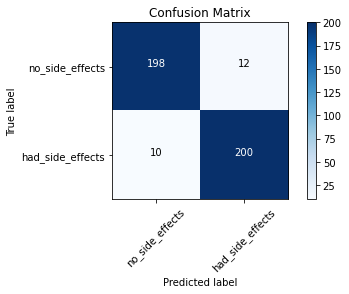

In [27]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Save and Load a Model

### 1. model.save()

In [28]:
# Checks first to see if file exists already.
# If not, the model is saved to disk.
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

This save functions saves:
- The architecture of the model, allowing to re-create the model.
- The weights of the model.
- The training configuration (loss, optimizer).
- The state of the optimizer, allowing to resume training exactly where you left off.


In [29]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [30]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [31]:
new_model.get_weights()

[array([[ 0.66041297, -0.42287597,  0.70743144,  0.22229029, -0.0230478 ,
          0.3464646 , -0.37161654, -0.4364695 , -0.136868  , -0.15265298,
         -0.06606877,  0.24787427,  0.23808615,  0.4033957 , -0.08289272,
         -0.09918111]], dtype=float32),
 array([-0.10995001,  0.        , -0.01893946, -0.02880946,  0.        ,
         0.01607688,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.06091552, -0.07365988, -0.06915655,  0.        ,
         0.18119639], dtype=float32),
 array([[-0.3063565 , -0.02353648, -0.44076058,  0.01424379,  0.5295122 ,
          0.08212426, -0.269985  ,  0.4198937 ,  0.25303566, -0.23696692,
          0.07007609, -0.31789744, -0.3377205 , -0.21514373, -0.47499824,
         -0.50285876,  0.3799069 ,  0.4336587 ,  0.4823647 ,  0.07718739,
          0.1960525 ,  0.407256  ,  0.36644128,  0.1264907 ,  0.03140691,
         -0.36819023,  0.39242253, -0.26468584,  0.03569502, -0.24895464,
          0.51035416, -0.14360958],
 

In [32]:
new_model.optimizer

### 2. model.to_json()

If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only.

In [33]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [34]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dens

In [35]:
# model reconstruction from JSON:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from tensorflow.keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [36]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 3. model.save_weights()

If you only need to save the weights of a model, you can use the following function save the weights only.

In [37]:
# Checks first to see if file exists already.
# If not, the weights are saved to disk.
import os.path
if os.path.isfile('models/my_model_weights.h5') is False:
    model.save_weights('models/my_model_weights.h5')

In [38]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [39]:
model2.load_weights('models/my_model_weights.h5')

In [40]:
model2.get_weights()

[array([[ 0.66041297, -0.42287597,  0.70743144,  0.22229029, -0.0230478 ,
          0.3464646 , -0.37161654, -0.4364695 , -0.136868  , -0.15265298,
         -0.06606877,  0.24787427,  0.23808615,  0.4033957 , -0.08289272,
         -0.09918111]], dtype=float32),
 array([-0.10995001,  0.        , -0.01893946, -0.02880946,  0.        ,
         0.01607688,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.06091552, -0.07365988, -0.06915655,  0.        ,
         0.18119639], dtype=float32),
 array([[-0.3063565 , -0.02353648, -0.44076058,  0.01424379,  0.5295122 ,
          0.08212426, -0.269985  ,  0.4198937 ,  0.25303566, -0.23696692,
          0.07007609, -0.31789744, -0.3377205 , -0.21514373, -0.47499824,
         -0.50285876,  0.3799069 ,  0.4336587 ,  0.4823647 ,  0.07718739,
          0.1960525 ,  0.407256  ,  0.36644128,  0.1264907 ,  0.03140691,
         -0.36819023,  0.39242253, -0.26468584,  0.03569502, -0.24895464,
          0.51035416, -0.14360958],
 

# Convolutional Neural Networks

In [41]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [42]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


## Data preparation

The images included in the data/cats-and-dogs directory are a random subset of the full cat and dog data set from the following Kaggle competition:
https://www.kaggle.com/c/dogs-vs-cats/data

In [43]:
train_path = 'data/cats-and-dogs/train'
valid_path = 'data/cats-and-dogs/valid'
test_path = 'data/cats-and-dogs/test'

In [44]:
train_batches = ImageDataGenerator().flow_from_directory(directory=train_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(directory=valid_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(directory=test_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=10)

Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [45]:
assert train_batches.n == 40
assert valid_batches.n == 16
assert test_batches.n == 10
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [46]:
# plots images with labels within jupyter notebook
# source: https://github.com/fastai/courses/blob/master/deeplearning1/nbs/utils.py#L79

def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [47]:
imgs, labels = next(train_batches)

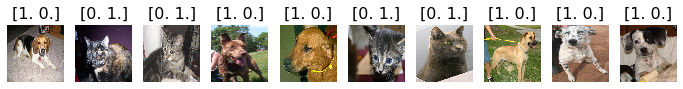

In [48]:
plots(imgs, titles=labels)

## Build and train a CNN

In [49]:
model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)),
        Flatten(),
        Dense(units=2, activation='softmax'),
    ])

In [50]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
flatten (Flatten)            (None, 1577088)           0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(x=train_batches, steps_per_epoch=4, 
                    validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 4 steps, validate for 4 steps
Epoch 1/5
4/4 - 2s - loss: 2046.9235 - accuracy: 0.6000 - val_loss: 301.4386 - val_accuracy: 0.5000
Epoch 2/5
4/4 - 0s - loss: 409.4316 - accuracy: 0.6500 - val_loss: 693.1045 - val_accuracy: 0.5000
Epoch 3/5
4/4 - 0s - loss: 378.4715 - accuracy: 0.6250 - val_loss: 333.9119 - val_accuracy: 0.5625
Epoch 4/5
4/4 - 0s - loss: 81.3993 - accuracy: 0.7750 - val_loss: 430.6103 - val_accuracy: 0.5625
Epoch 5/5
4/4 - 0s - loss: 25.9811 - accuracy: 0.9500 - val_loss: 319.0843 - val_accuracy: 0.5000


## Predict

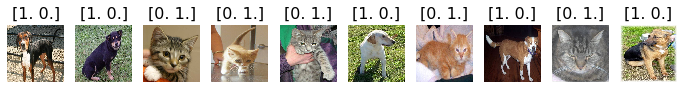

In [53]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [54]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 0., 0., 0., 1., 0., 1., 0., 1.], dtype=float32)

In [55]:
predictions = model.predict(x=test_batches, steps=1, verbose=0)

In [56]:
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [57]:
cm = confusion_matrix(y_true=test_labels, y_pred=np.round(predictions[:,0]))

In [58]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 5]
 [0 5]]


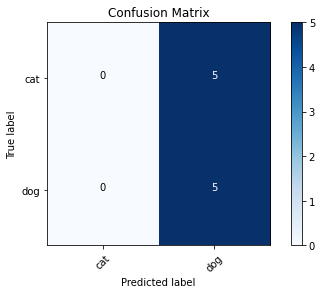

In [59]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Build Fine-tuned VGG16 model

In [60]:
# Download model - Internet connection needed
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [61]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [62]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return {'non_trainable_params': non_trainable_params, 'trainable_params': trainable_params}

In [63]:
params = count_params(vgg16_model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 138357544

In [64]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [65]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [66]:
params = count_params(model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 134260544

In [67]:
for layer in model.layers:
    layer.trainable = False

In [68]:
model.add(Dense(units=2, activation='softmax'))

In [69]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [70]:
params = count_params(model)
assert params['non_trainable_params'] == 134260544
assert params['trainable_params'] == 8194

## Train the fine-tuned VGG16 model

In [71]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
model.fit(x=train_batches, steps_per_epoch=4, 
                    validation_data=valid_batches, validation_steps=4, epochs=10, verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 4 steps, validate for 4 steps
Epoch 1/10
4/4 - 3s - loss: 3.7945 - accuracy: 0.2000 - val_loss: 2.5985 - val_accuracy: 0.3125
Epoch 2/10
4/4 - 0s - loss: 3.0334 - accuracy: 0.2250 - val_loss: 2.0483 - val_accuracy: 0.3125
Epoch 3/10
4/4 - 0s - loss: 2.3562 - accuracy: 0.3000 - val_loss: 1.5145 - val_accuracy: 0.3750
Epoch 4/10
4/4 - 0s - loss: 1.7586 - accuracy: 0.3750 - val_loss: 1.0444 - val_accuracy: 0.4375
Epoch 5/10
4/4 - 0s - loss: 1.2326 - accuracy: 0.5000 - val_loss: 0.7061 - val_accuracy: 0.5625
Epoch 6/10
4/4 - 0s - loss: 0.8537 - accuracy: 0.6250 - val_loss: 0.4983 - val_accuracy: 0.6875
Epoch 7/10
4/4 - 0s - loss: 0.6143 - accuracy: 0.7500 - val_loss: 0.3718 - val_accuracy: 0.8125
Epoch 8/10
4/4 - 0s - loss: 0.4161 - accuracy: 0.7500 - val_loss: 0.3007 - val_accuracy: 0.8750
Epoch 9/10
4/4 - 0s - loss: 0.2757 - accuracy: 0.8250 - val_loss: 0.2587 - val_accuracy: 0.8750
Epoch 10/10
4/4 - 0s - loss: 0.1966 - accuracy

In [73]:
assert model.history.history.get('accuracy')[-1] > 0.85

## Predict using fine-tuned VGG16 model

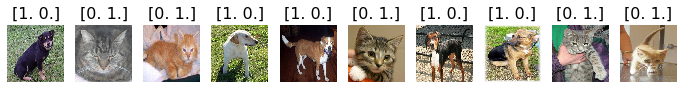

In [74]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [75]:
test_labels = test_labels[:,0]
test_labels

array([1., 0., 0., 1., 1., 0., 1., 1., 0., 0.], dtype=float32)

In [76]:
predictions = model.predict(x=test_batches, steps=1, verbose=0)

In [77]:
cm = confusion_matrix(y_true=test_labels, y_pred=np.round(predictions[:,0]))

Confusion matrix, without normalization
[[5 0]
 [1 4]]


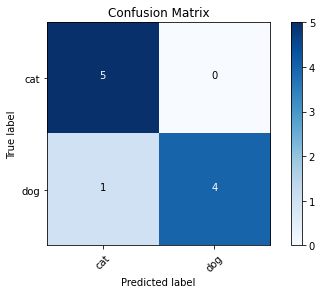

In [78]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Data Augmentation

Data augmentation occurs when you create new data based on modifications of your existing data. In our case, our data will be images.Data augmentation on images would include transformations like:
 - Flipping the image either horizontally or vertically
 - Rotating the image
 - Zooming in or out on the image
 - Cropping the image
 - Varying the color on the image

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [80]:
# plots images with labels within jupyter notebook
# source: https://github.com/fastai/courses/blob/master/deeplearning1/nbs/utils.py#L79

def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [81]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True)

In [82]:
chosen_image = random.choice(os.listdir('data/cats-and-dogs/train/dog'))

In [83]:
image_path = 'data/cats-and-dogs/train/dog/' + chosen_image

In [84]:
assert os.path.isfile(image_path)

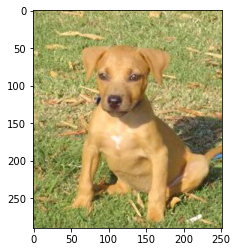

In [85]:
# Obtain image
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])

In [86]:
# Generate batches of augmented images from this image
aug_iter = gen.flow(image)

In [87]:
# Get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

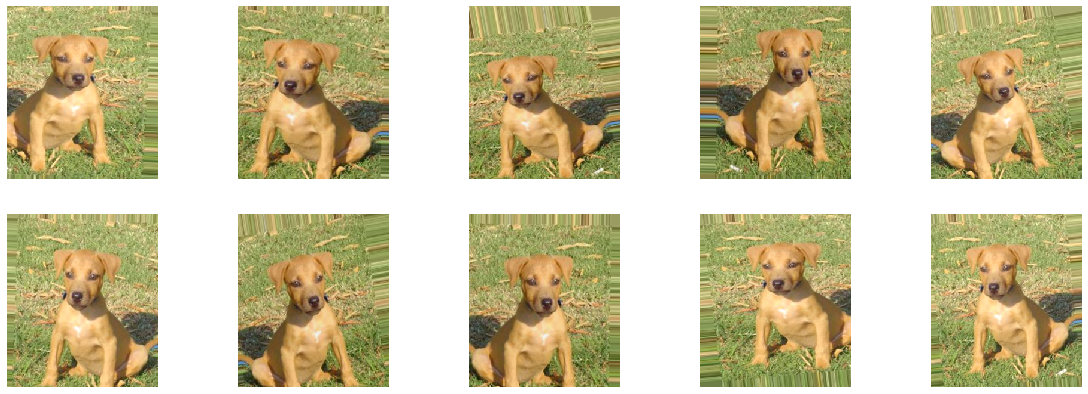

In [88]:
# Augmented images
plots(aug_images, figsize=(20,7), rows=2)